In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("sales_data_sample.csv",encoding="unicode-escape")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [9]:
df.size


3675

In [11]:
x=df[["SALES","PRICEEACH","QUANTITYORDERED"]]

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [13]:
from sklearn.cluster import KMeans
inertia=[]
K=range(1,11)
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)


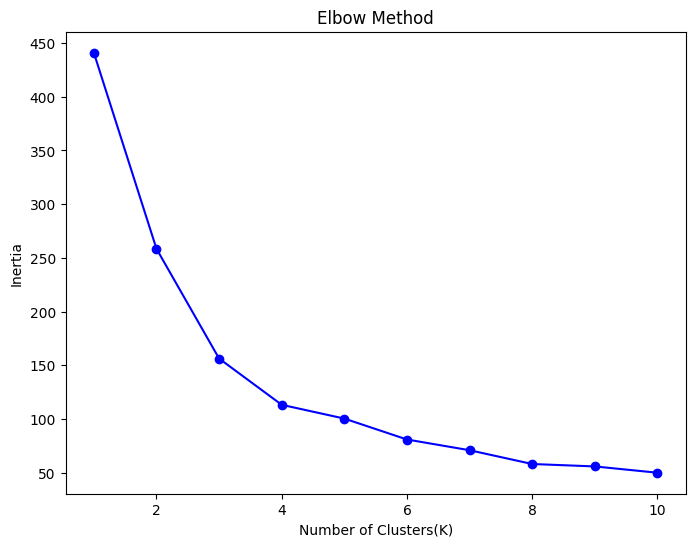

In [14]:
plt.figure(figsize=(8,6))
plt.plot(K,inertia,'bo-')
plt.xlabel("Number of Clusters(K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [18]:
optimal_k=4
kmeans=KMeans(n_clusters=optimal_k,random_state=42)
df["clusters"]=kmeans.fit_predict(x_scaled)
df[["SALES","PRICEEACH","QUANTITYORDERED","clusters"]]

,SALES,PRICEEACH,QUANTITYORDERED,clusters
10,3965.66,100.00,37,2
21,1451.00,72.55,20,0
40,4905.39,100.00,21,2
47,3944.70,100.00,30,2
51,2416.56,100.00,24,2
...,...,...,...,...
2667,3268.00,76.00,43,3
2673,1747.20,67.20,26,0
2685,5001.92,100.00,44,1
2764,4277.35,100.00,35,2
